In [56]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

# Project1 _ 금리가 인상할때, 가격이 크게 올랐던 섹터 및 감소 했던 섹터는?


C:\Users\yys\AppData\Local\Temp\ipykernel_29664\2438370215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10Y_rate_close.drop(drop_date,axis=0,inplace=True)


<Axes: xlabel='Date'>

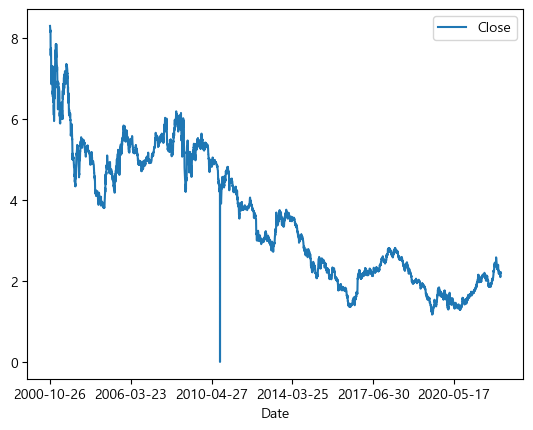

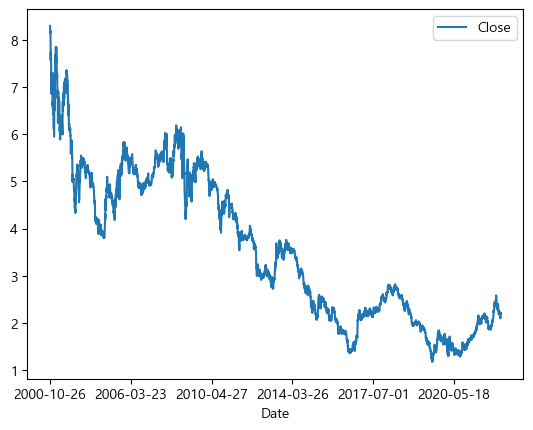

In [57]:
df_10Y_rate = pd.read_csv('./Data/10Y Rate.csv', index_col = 'Date')
df_10Y_rate_close=df_10Y_rate[['Close']]
df_10Y_rate_close.plot() # 금리가 0??? 잘못된 부분같다!

drop_date=df_10Y_rate_close.index[df_10Y_rate_close['Close'].argmin()]
df_10Y_rate_close.drop(drop_date,axis=0,inplace=True)
df_10Y_rate_close.plot()

<Axes: xlabel='Date'>

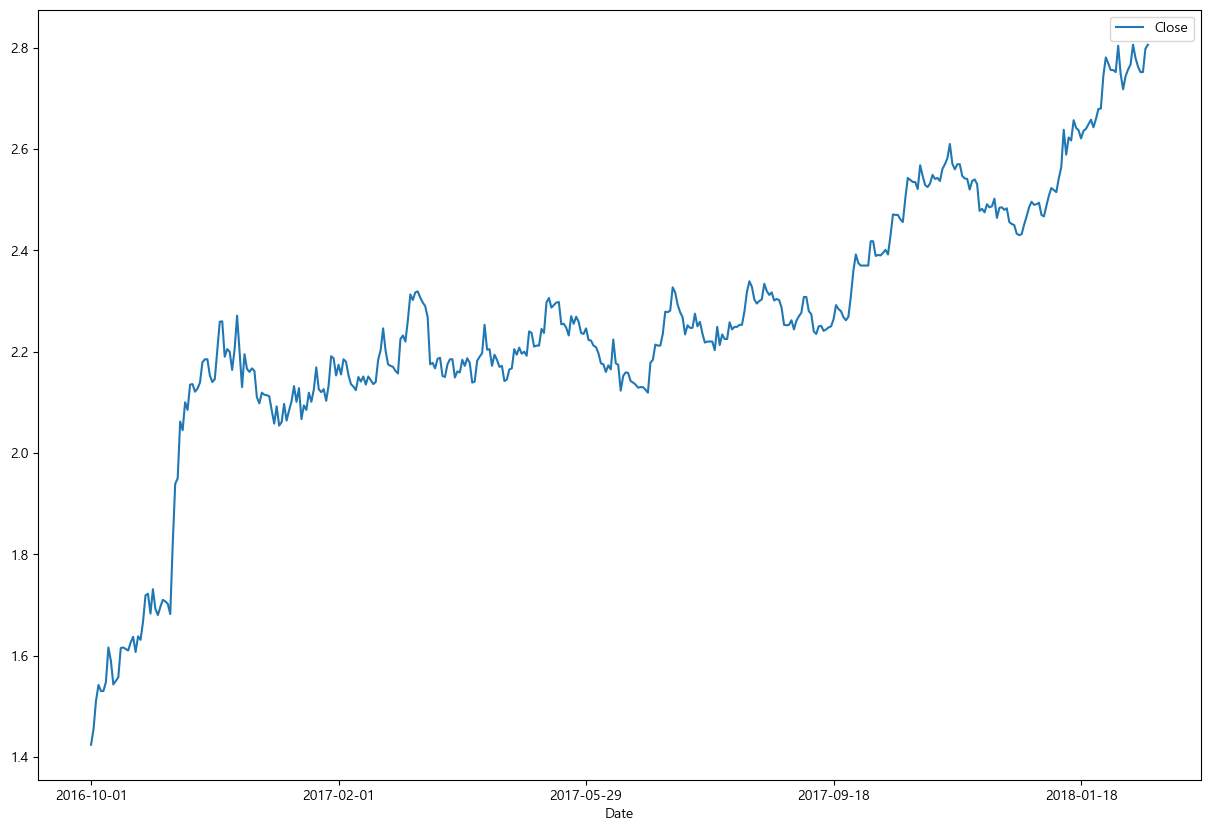

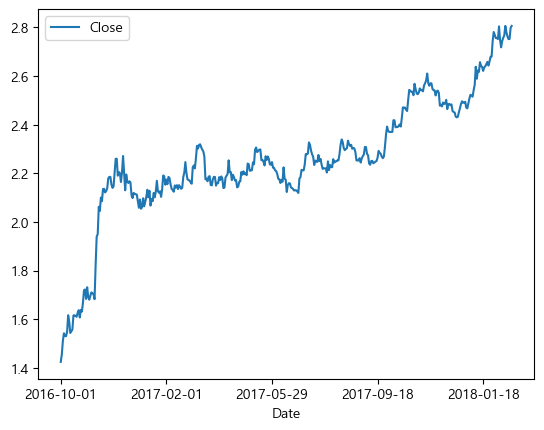

In [58]:
df_10Y_rate_close.loc['2016-10-01':'2018-02-20'].plot(figsize = (15,10))
df_10Y_rate_close_sample = df_10Y_rate_close.loc['2016-10-01':'2018-02-20']
df_10Y_rate_close_sample.plot()

## 분석할 섹터 고르기</br>

*** KODEX ETF DataFrame 만들기 </br>
*** krx_df에서 KODEX ETF만 뽑아내기</br>

In [59]:
krx_df = pd.read_csv("./Data/KRX.csv", encoding='cp949', index_col = 0)
kodex_etf_info=krx_df[krx_df['Name'].str.contains('KODEX', na=False)]
kodex_etf_info

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
1492,69500,KOSPI,KODEX 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493,226980,KOSPI,KODEX 200 중소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,337160,KOSPI,KODEX 200ESG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,363580,KOSPI,KODEX 200IT TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,278530,KOSPI,KODEX 200TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1617,375770,KOSPI,KODEX 탄소효율그린뉴딜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618,266410,KOSPI,KODEX 필수소비재,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,298770,KOSPI,KODEX 한국대만IT프리미어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,266420,KOSPI,KODEX 헬스케어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 너무 많은 섹터를 하기 어려우니, 대표 섹터 20개 선정!

In [60]:
# 섹터 고르기(20개)
sector_list = ['KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)',
              'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송',
              'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어']
len(sector_list)

20

## KODEX Sector DataFrame</br>


*** 위에서 선택한 Sector_list에 해당하는 KODEX Sector DF 만든다</br>
*** 관찰할 Sample DataFrame을 만든다</br>

In [61]:
kodex_etf_price_df = pd.read_csv('./Data/KODEX_ETF.csv', index_col = 'Date')
kodex_etf_price_df

,KODEX 200,KODEX 200 중소형,KODEX 200ESG,KODEX 200IT TR,KODEX 200TR,KODEX 200exTOP,KODEX 200가치저변동,KODEX 200동일가중,KODEX 200롱코스닥150숏선물,KODEX 200미국채혼합,...,KODEX 코스피100,KODEX 코스피TR,KODEX 코스피대형주,KODEX 콩선물(H),KODEX 퀄리티Plus,KODEX 탄소효율그린뉴딜,KODEX 필수소비재,KODEX 한국대만IT프리미어,KODEX 헬스케어,KODEX 혁신기술테마액티브
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8840,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,21239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,21118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8960,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,21081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8995,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,20784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,13590.0,14300.0,13960.0,13070.0,13325.0,10925.0,11990.0,10305.0,13320.0,...,30660.0,13890.0,14075.0,11570,10355.0,9715.0,8370.0,20830.0,15875.0,13145.0
2021-12-24,40115,13745.0,14470.0,14135.0,13160.0,13425.0,10955.0,12070.0,10300.0,13340.0,...,30795.0,13960.0,14175.0,11525,10405.0,9790.0,8350.0,20855.0,15785.0,13210.0
2021-12-27,39880,13735.0,14385.0,14000.0,13100.0,13405.0,10925.0,12060.0,10180.0,13320.0,...,30630.0,13905.0,14095.0,11640,10475.0,9775.0,8350.0,21025.0,16015.0,13195.0


In [62]:
kodex_etf_info['Name'].isin(sector_list).sum()

np.int64(20)

In [63]:
kodex_sector_df=kodex_etf_price_df.loc['2016-10-01':'2018-02-20',sector_list]
kodex_sector_df.isna().sum()

KODEX 200          0
KODEX IT         121
KODEX 건설           0
KODEX 게임산업       340
KODEX 경기소비재      121
KODEX 고배당        254
KODEX 골드선물(H)      0
KODEX 구리선물(H)      0
KODEX 기계장비         0
KODEX 바이오          0
KODEX 반도체          0
KODEX 보험           0
KODEX 에너지화학        0
KODEX 운송           0
KODEX 은행           0
KODEX 자동차          0
KODEX 증권           0
KODEX 철강           0
KODEX 필수소비재      121
KODEX 헬스케어       121
dtype: int64

In [64]:
# 날짜기간과 안 맞는 Sector을 분별한다

drop_list = ['KODEX 게임산업', 'KODEX 고배당', 'KODEX IT', 'KODEX 필수소비재', 'KODEX 헬스케어', 'KODEX 경기소비재']
kodex_sector_df.drop(drop_list,axis=1,inplace=True)

## 국고채 10년 DataFrame과 KODEX Sector DataFrame의 Shape 비교</br>

*** 국고채 10년 DataFrame과 KODEX Sector DataFrame Index 비교하기</br>
*** 프로젝트에 필요한 새로운 DataFrame을 만든다

In [65]:
print(df_10Y_rate_close_sample.shape)
print(kodex_sector_df.shape)

(428, 1)
(340, 14)


In [66]:
condition=df_10Y_rate_close_sample.index.isin(kodex_sector_df.index)
df_10Y_rate_close_resample=df_10Y_rate_close_sample[condition]
df_10Y_rate_close_resample

,Close
Date,
2016-10-04,1.455
2016-10-05,1.511
2016-10-06,1.542
2016-10-07,1.530
2016-10-10,1.548
...,...
2018-02-12,2.806
2018-02-13,2.780
2018-02-14,2.763


In [67]:
df=pd.concat([df_10Y_rate_close_resample,kodex_sector_df], axis=1, join= 'inner')
df.rename(columns={'Close':'10Y Rate'},inplace=True)
df

,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,1.455,23289,2845,10025,4770,6055,9802.0,19328,7325,9433,3185,5319,16658,4840,8011
2016-10-05,1.511,23276,2832,9725,4730,6026,9627.0,19472,7200,9437,3175,5290,16668,4810,7904
2016-10-06,1.542,23436,2859,9705,4730,6142,9522.0,19386,7235,9352,3155,5319,16440,4794,7914
2016-10-07,1.530,23364,2874,9595,4675,6167,9143.0,19284,7217,9330,3155,5286,16389,4794,7790
2016-10-10,1.548,23402,2894,9685,4730,6182,9223.0,18959,7307,9398,3150,5410,16403,4832,7892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,2.806,28732,2765,9885,6405,5365,12392.0,25928,8496,12820,2973,8011,15281,7231,9678
2018-02-13,2.780,28954,2726,9910,6480,5185,12117.0,25938,8413,12839,2924,7993,15028,7066,9612
2018-02-14,2.763,29332,2765,9955,6560,5312,12492.0,26445,8399,12900,2958,7973,15084,7074,9664


<Axes: xlabel='Date'>

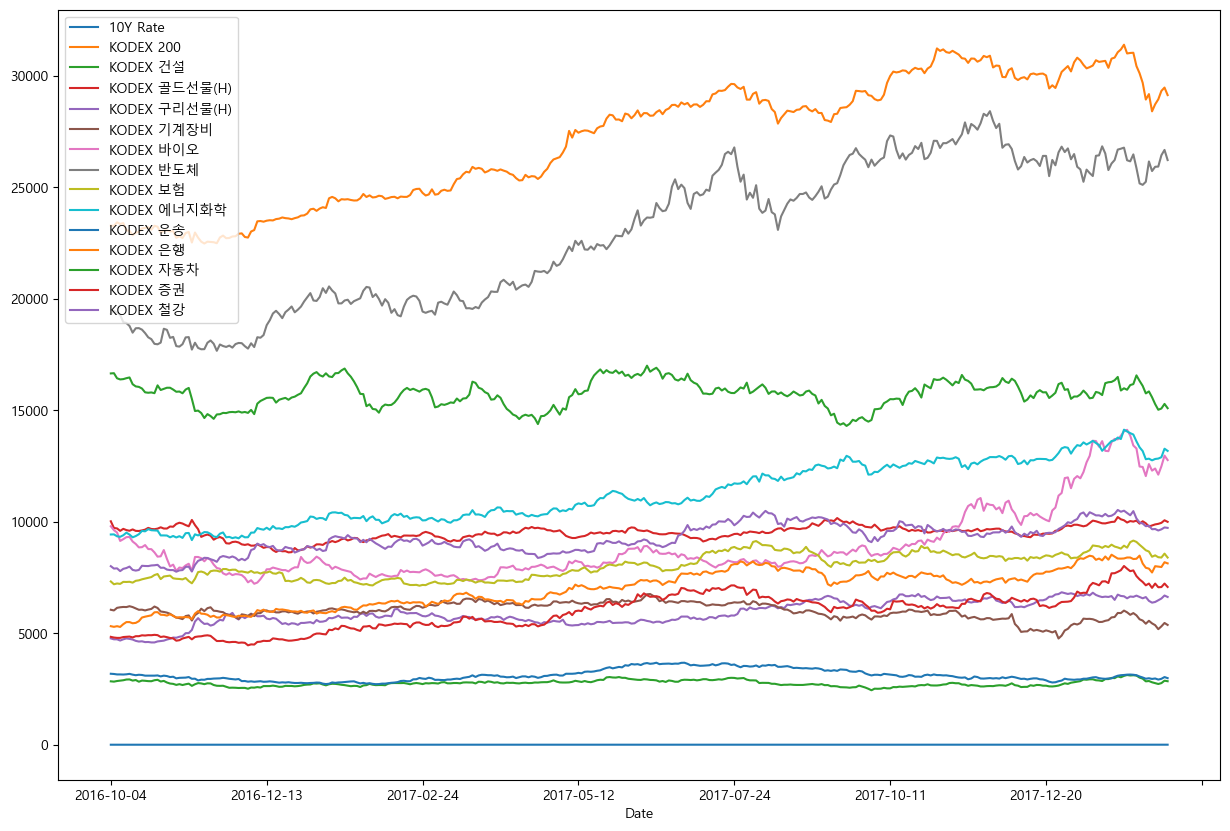

In [68]:
df.plot(figsize=(15,10))

## 10Y Rate 및 각 ETF 가격 수준이 달라 움직임을 확인하기 어려움!
- 시작점을 같게 범위를 바꿔주면 좋을듯!
- 가격을 원하는 것이 아닌, 어느 섹터가 많이 오르고 많이 내려갔는지가 중요함

In [73]:
df_set=(df/df.iloc[0])*100
df_set

,10Y Rate,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,,
2016-10-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-10-05,103.848797,99.944180,99.543058,97.007481,99.161426,99.521057,98.214650,100.745033,98.293515,100.042404,99.686028,99.454785,100.060031,99.380165,98.664337
2016-10-06,105.979381,100.631199,100.492091,96.807980,99.161426,101.436829,97.143440,100.300083,98.771331,99.141312,99.058085,100.000000,98.691319,99.049587,98.789165
2016-10-07,105.154639,100.322040,101.019332,95.710723,98.008386,101.849711,93.276882,99.772351,98.525597,98.908089,99.058085,99.379583,98.385160,99.049587,97.241293
2016-10-10,106.391753,100.485208,101.722320,96.608479,99.161426,102.097440,94.093042,98.090853,99.754266,99.628962,98.901099,101.710848,98.469204,99.834711,98.514543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,192.852234,123.371549,97.188049,98.603491,134.276730,88.604459,126.423179,134.147351,115.986348,135.905862,93.343799,150.611017,91.733702,149.400826,120.808888
2018-02-13,191.065292,124.324789,95.817223,98.852868,135.849057,85.631709,123.617629,134.199089,114.853242,136.107283,91.805338,150.272608,90.214912,145.991736,119.985021
2018-02-14,189.896907,125.947872,97.188049,99.301746,137.526205,87.729149,127.443379,136.822227,114.662116,136.753949,92.872841,149.896597,90.551087,146.157025,120.634128


<Axes: xlabel='Date'>

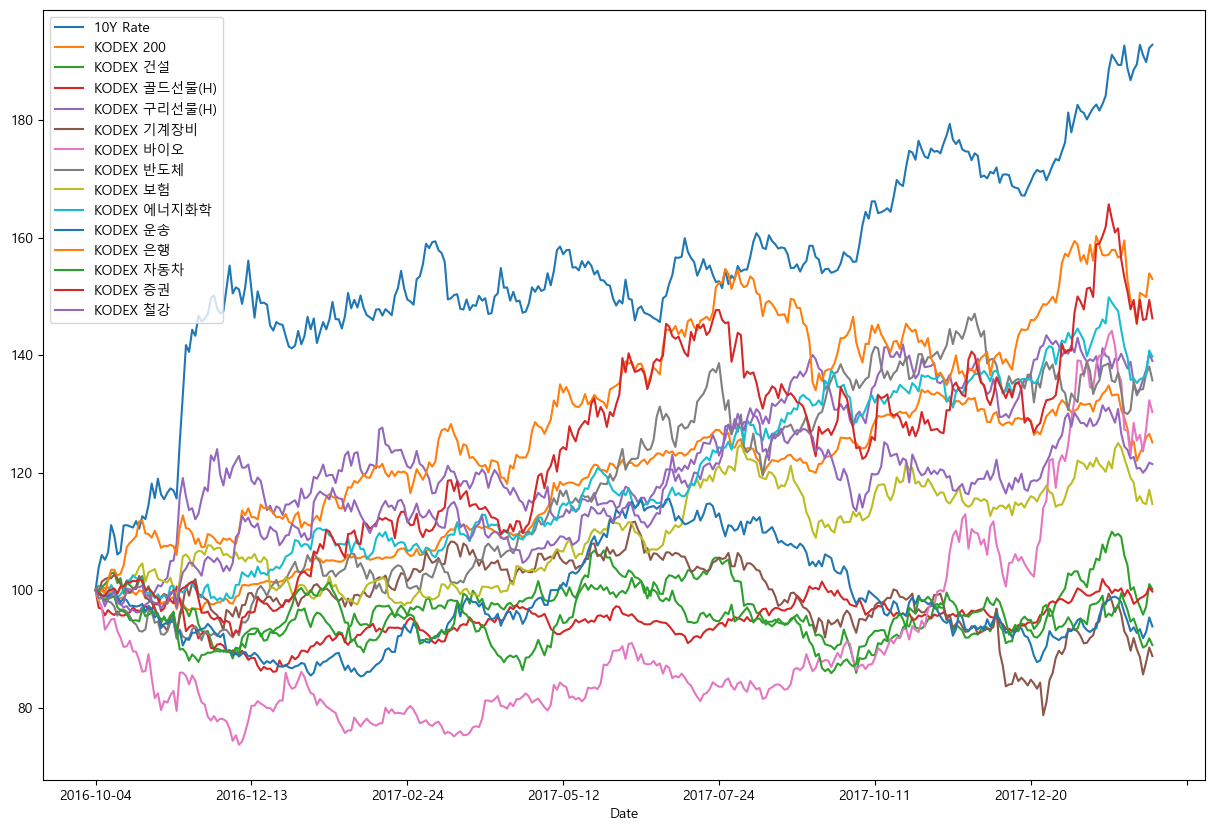

In [75]:
# 처음 기준점을 100으로 두고 그래프를 보자!
df_set.plot(figsize=(15,10))

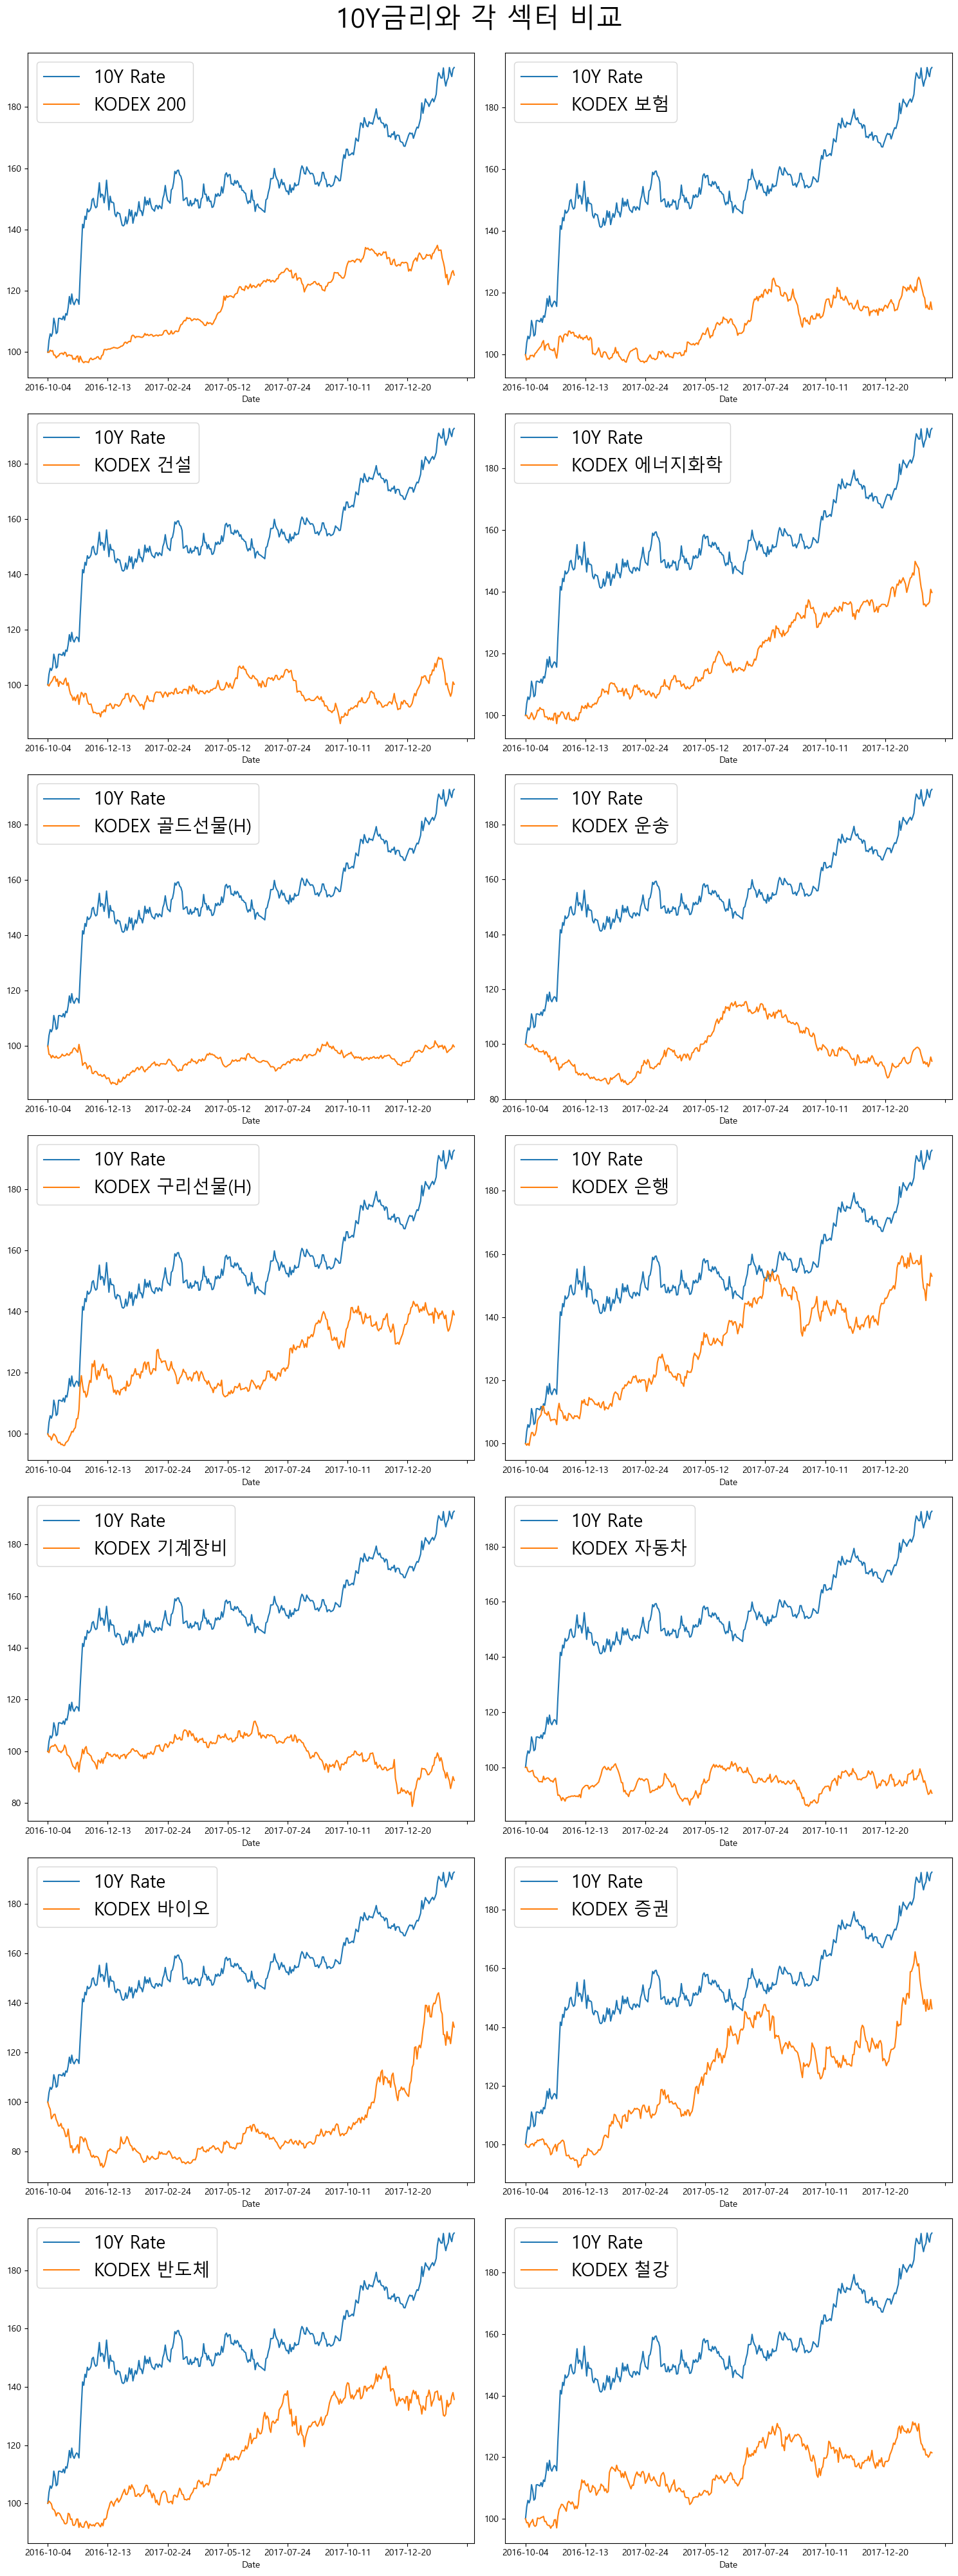

In [85]:
plt.rc('axes', unicode_minus = False)

fig,axes=plt.subplots(nrows=7,ncols=2,figsize = (15,40))
col_index =1

for col in range(2):
    for row in range(7):
        df_set['10Y Rate'].plot(ax=axes[row,col])
        df_set[df_set.columns[col_index]].plot(ax=axes[row,col])
        col_index+=1
        axes[row, col].legend(fontsize = 20)


fig.suptitle("10Y금리와 각 섹터 비교", fontsize=30, y=1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
fig.tight_layout()


## Correlation & Return

In [96]:
df_corr=df_set.corr()['10Y Rate'][1:].sort_values(ascending=False)
df_corr

KODEX 구리선물(H)    0.880630
KODEX 에너지화학      0.821850
KODEX 200        0.782493
KODEX 은행         0.775425
KODEX 철강         0.767162
KODEX 반도체        0.749889
KODEX 증권         0.716706
KODEX 보험         0.682403
KODEX 바이오        0.622272
KODEX 골드선물(H)    0.237232
KODEX 건설         0.001318
KODEX 자동차       -0.020111
KODEX 운송        -0.025913
KODEX 기계장비      -0.396009
Name: 10Y Rate, dtype: float64

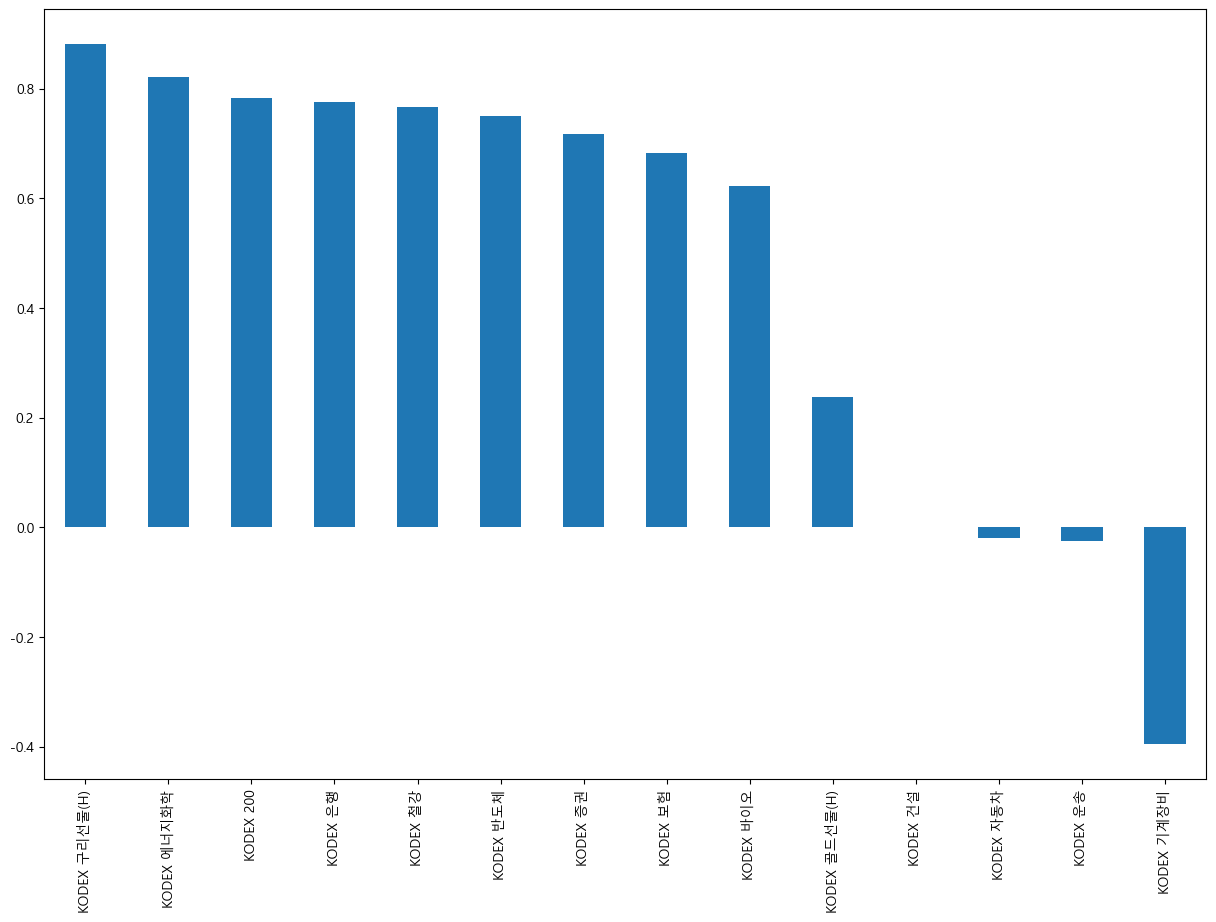

In [97]:
df_corr.plot.bar(figsize = (15,10))
plt.rc('axes', unicode_minus = False)

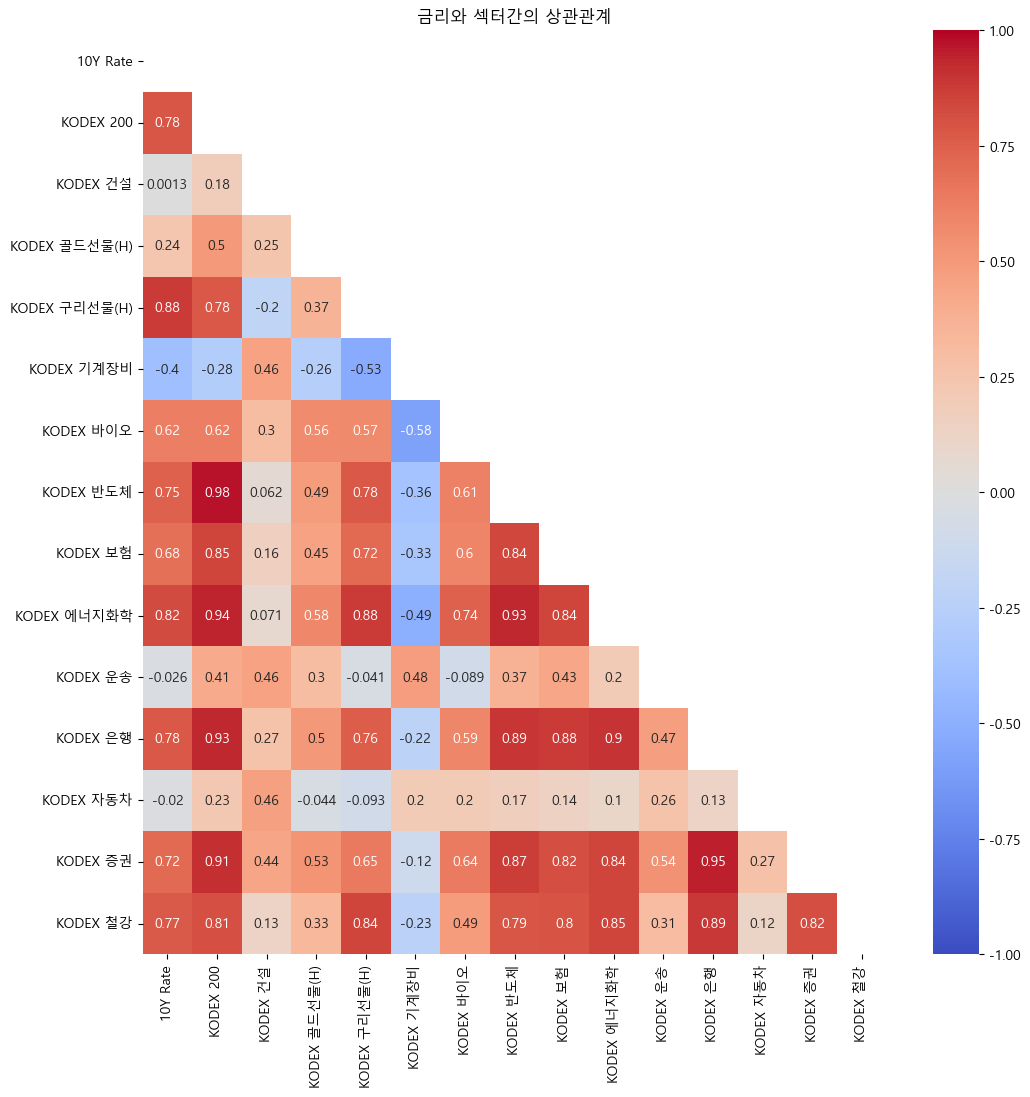

In [104]:
import seaborn as sns

# 상관계수 계산
corr = df_set.corr()

# 마스킹: 하삼각형을 제거
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(12,12))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('금리와 섹터간의 상관관계')
plt.show()

In [99]:
return_sereis = (df_set.iloc[df_set.shape[0]-1] - df_set.iloc[0])/df_set.iloc[0]
return_sereis.sort_values(ascending=False )

10Y Rate         0.928522
KODEX 은행         0.529799
KODEX 증권         0.462603
KODEX 에너지화학      0.397541
KODEX 구리선물(H)    0.389937
KODEX 반도체        0.357099
KODEX 바이오        0.302897
KODEX 200        0.251406
KODEX 철강         0.214455
KODEX 보험         0.146621
KODEX 건설         0.001757
KODEX 골드선물(H)   -0.002494
KODEX 운송        -0.061852
KODEX 자동차       -0.093589
KODEX 기계장비      -0.112304
dtype: float64